In [1]:
#import libraries and functions 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb

In [2]:
#connect dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url, sep=';')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable as X and Y
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [5]:
#Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
#Create Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, Y_train)
y_pred = rf_clf.predict(X_test)

<AxesSubplot:>

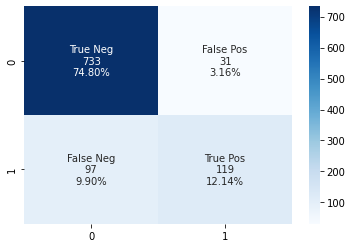

In [7]:
#Create Confusion matrix for Random Forest Classifier model
cf_matrix = confusion_matrix(Y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [8]:
#Print classification report for Random Forest Classifier model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       764
           1       0.79      0.55      0.65       216

    accuracy                           0.87       980
   macro avg       0.84      0.76      0.78       980
weighted avg       0.86      0.87      0.86       980



In [9]:
#Create Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

<AxesSubplot:>

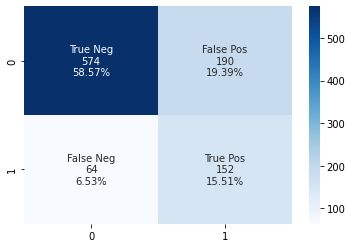

In [10]:
#Create Confusion matrix for Gaussian Naive Bayes model
cf_matrix = confusion_matrix(Y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [11]:
#Print classification report for Gaussian Naive Bayes model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       764
           1       0.44      0.70      0.54       216

    accuracy                           0.74       980
   macro avg       0.67      0.73      0.68       980
weighted avg       0.80      0.74      0.76       980



In [12]:
#Create K Neighbors Classifier model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)
y_pred = neigh.predict(X_test)


<AxesSubplot:>

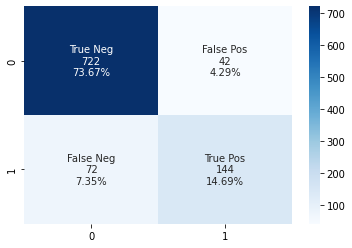

In [13]:
#Create Confusion matrix for K Neighbors Classifier model
cf_matrix = confusion_matrix(Y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')


In [14]:
#Print classification report for K Neighbors Classifier model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       764
           1       0.77      0.67      0.72       216

    accuracy                           0.88       980
   macro avg       0.84      0.81      0.82       980
weighted avg       0.88      0.88      0.88       980

